# PROMOTION BUMP ASSIGNMENT
**Date:** 2024-09-19  
**Data Scientist:** Botan Fırat BULUT

## IMPORTS AND SETUP

In [122]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignone harmless warnings:
warnings.filterwarnings('ignore')

# Round float columns to 4 decimal places:
pd.options.display.float_format = '{:.4f}'.format

# Plot rcParams:
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['figure.dpi'] = 144
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titleweight'] = 'bold'
plt.style.use('seaborn-v0_8')

Data = Assignment4.1a.csv
The data contains daily sales of sample of items in several stores on a specific time frame. Negative sale quantities represents returns. Each row represents a sale (or return) activity for an item in a store at a specific day. If a store-item combination has no observation in a certain day you can assume there is no sales for that item at that store at that day.

In [123]:
# Read assignment4.1a.csv:
df1a = pd.read_csv('./assignment4.1a.csv')
df1a.head()

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0


In [124]:
# Df1a infomation:
df1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873618 entries, 0 to 1873617
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Date           object
 1   StoreCode      int64 
 2   ProductCode    int64 
 3   SalesQuantity  int64 
dtypes: int64(3), object(1)
memory usage: 57.2+ MB


In [125]:
# Descriptive Statistics:
df1a.describe().T

,count,mean,std,min,25%,50%,75%,max
StoreCode,1873618.0000,171.1288,101.4606,1.0000,81.0000,170.0000,264.0000,340.0000
ProductCode,1873618.0000,166.3533,77.7328,1.0000,105.0000,173.0000,219.0000,317.0000
SalesQuantity,1873618.0000,2.2466,5.0290,-60.0000,0.0000,1.0000,2.0000,912.0000


In [126]:
# Fix columns data type for computational and memory efficiency:
df1a['StoreCode'] = df1a['StoreCode'].astype('uint16')
df1a['ProductCode'] = df1a['ProductCode'].astype('uint16')
df1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873618 entries, 0 to 1873617
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Date           object
 1   StoreCode      uint16
 2   ProductCode    uint16
 3   SalesQuantity  int64 
dtypes: int64(1), object(1), uint16(2)
memory usage: 35.7+ MB


In [127]:
# Check the null values:
df1a.isnull().sum()

Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

In [128]:
# Convert Date Column:
df1a['Date'] = pd.to_datetime(df1a['Date'],
                             format='%Y-%m-%d')

df1a['Date'].describe()

count                          1873618
mean     2015-04-14 10:09:35.587126528
min                2015-01-01 00:00:00
25%                2015-02-23 00:00:00
50%                2015-04-13 00:00:00
75%                2015-06-03 00:00:00
max                2015-07-31 00:00:00
Name: Date, dtype: object

In [129]:
# Investigate ProductCode:
df1a[['ProductCode', 'StoreCode']].astype('object').describe()

,ProductCode,StoreCode
count,1873618,1873618
unique,317,340
top,149,331
freq,54060,17470


In [130]:
# Finally investigate SalesQuantity:
df1a['SalesQuantity'].describe()

count   1873618.0000
mean          2.2466
std           5.0290
min         -60.0000
25%           0.0000
50%           1.0000
75%           2.0000
max         912.0000
Name: SalesQuantity, dtype: float64

- assignment4.1a.csv contains 1873618 rows and 4 columns.
- Dataset data range is from 2015-01-01 to 2015-07-31
- There are 317 unique product codes. 149 is the most recorded value (54060 records)
- There are 340 unique store codes. 331 Product code is the most recorded value (17470 records)
- Sales data exhibit wide range. This feature needs furher groupping to be analzed properly.

## Data=Promotiondates.csv
The data contains beginning and the end dates of 6 promotions that took
place in 2015.  

In [131]:
# Read promotion data:
df_promotion = pd.read_csv('./PromotionDates.csv')
df_promotion

,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015
4,Promo5,1/9/2015,6/9/2015
5,Promo6,20/11/2015,27/11/2015


In [132]:
# Promotion data's last 2 rows contain day first datetime format.
# We fix this manually since there are only 4 wrong entries:
df_promotion.at[4, 'StartDate'] = '9/1/2015'
df_promotion.at[4, 'EndDate'] = '9/6/2015'
df_promotion.at[5, 'StartDate'] = '11/20/2015'
df_promotion.at[5, 'EndDate'] = '11/27/2015'
df_promotion

,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015
4,Promo5,9/1/2015,9/6/2015
5,Promo6,11/20/2015,11/27/2015


A. Your goal is to model the effect of promotion on products and stores. At this stage
only use the data in the file Assignment4.1a.csv and base your model using the
first 4 promotions.

## PREPROCESSING

In [133]:
# Convert df1a column to datetime:
df1a['Date'] = pd.to_datetime(df1a['Date'], format='%Y-%m-%d')
df1a['Date'].dtype

dtype('<M8[ns]')

In [134]:
# Convert promotion start and end dates to datetime column:
df_promotion['StartDate'] = pd.to_datetime(df_promotion['StartDate'],
                                          format='%m/%d/%Y')

df_promotion['EndDate'] = pd.to_datetime(df_promotion['EndDate'],
                                         format='%m/%d/%Y')

df_promotion[['StartDate', 'EndDate']].dtypes

StartDate    datetime64[ns]
EndDate      datetime64[ns]
dtype: object

In [135]:
# Obtain the week date from days:
df1a['WeekNumber'] = df1a['Date'].dt.isocalendar().week.astype('uint8')
df1a['WeekDay'] = df1a['Date'].dt.isocalendar().day.astype('uint8')
df1a.head()

,Date,StoreCode,ProductCode,SalesQuantity,WeekNumber,WeekDay
0,2015-01-01,8,9,-1,1,4
1,2015-01-01,131,9,1,1,4
2,2015-01-01,144,9,2,1,4
3,2015-01-01,203,9,2,1,4
4,2015-01-01,256,9,0,1,4


In [136]:
# Obtain promotion data week numbers:
df_promotion['StartWeekNumber'] = (df_promotion['StartDate']
                                   .dt.isocalendar()
                                   .week.astype('uint8'))

df_promotion['EndWeekNumber'] = (df_promotion['EndDate']
                                 .dt.isocalendar()
                                 .week.astype('uint8'))

df_promotion

,Period,StartDate,EndDate,StartWeekNumber,EndWeekNumber
0,Promo1,2015-02-10,2015-02-17,7,8
1,Promo2,2015-03-15,2015-03-22,11,12
2,Promo3,2015-05-24,2015-06-01,21,23
3,Promo4,2015-06-21,2015-06-28,25,26
4,Promo5,2015-09-01,2015-09-06,36,36
5,Promo6,2015-11-20,2015-11-27,47,48


In [137]:
# Obtain no promo weeks:
promo_weeks = []
promo_weeks.extend(df_promotion['StartWeekNumber'].to_list())
promo_weeks.extend(df_promotion['EndWeekNumber'].to_list())
promo_weeks

[7, 11, 21, 25, 36, 47, 8, 12, 23, 26, 36, 48]

In [138]:
# Generate is_promo column:
temp = lambda x: True if x in promo_weeks else False
df1a['IsPromo'] = np.vectorize(temp)(df1a['WeekNumber'])
del temp
df1a['IsPromo'].value_counts()

IsPromo
False    1356327
True      517291
Name: count, dtype: int64

In [139]:
# Generate distinct promo columns for comparison:
for idx, promo in zip(df_promotion.index, df_promotion['Period'].values):
    start_week = df_promotion.iloc[idx]['StartWeekNumber']
    end_week = df_promotion.iloc[idx]['EndWeekNumber']
    
    # Create a boolean mask using vectorized operations
    df1a[f'Is{promo}'] = df1a['WeekNumber'].isin([start_week, end_week])

df1a.head()

,Date,StoreCode,ProductCode,SalesQuantity,WeekNumber,WeekDay,IsPromo,IsPromo1,IsPromo2,IsPromo3,IsPromo4,IsPromo5,IsPromo6
0,2015-01-01,8,9,-1,1,4,False,False,False,False,False,False,False
1,2015-01-01,131,9,1,1,4,False,False,False,False,False,False,False
2,2015-01-01,144,9,2,1,4,False,False,False,False,False,False,False
3,2015-01-01,203,9,2,1,4,False,False,False,False,False,False,False
4,2015-01-01,256,9,0,1,4,False,False,False,False,False,False,False


In [140]:
df1a.select_dtypes(include='bool').sum()

IsPromo     517291
IsPromo1    136600
IsPromo2    142613
IsPromo3    123720
IsPromo4    114358
IsPromo5         0
IsPromo6         0
dtype: int64

Divide product and stores into 3 clusters each. Product with higher average weekly sale per store during non-promotion periods will be called “Fast items” and items with lower weekly average sale per store will be labeled as “Slow items”, items in between will be called “Medium items”. Grouping parameters selection is left to you. Apply similar approach to Stores as well.

In [141]:
df1a.columns

Index(['Date', 'StoreCode', 'ProductCode', 'SalesQuantity', 'WeekNumber',
       'WeekDay', 'IsPromo', 'IsPromo1', 'IsPromo2', 'IsPromo3', 'IsPromo4',
       'IsPromo5', 'IsPromo6'],
      dtype='object')

In [142]:
# Get the no promotion data:
df1a_no_promotion = df1a.query('IsPromo == False')
df1a_no_promotion['IsPromo'].sum()

0

In [143]:
# Check duplication of storecode:
df1a_no_promotion[['StoreCode']].duplicated().any()

True

In [144]:
# Check duplication of productcode:
df1a_no_promotion[['ProductCode']].duplicated().any()

True

Both store code and product code contains duplicate values.

We will cluster slow, average, and fast products as follows:  
1 - We will calculate the weekly mean product sales for eachg store using pivot table function.  
2 - Then, we will define a function that will go over each store and week pairs. We will store mean sales for all products for each week and store pair (mean of mean values). After this task, we compare mean values of produt codes with the week mean for given store.  
3 - Products that are above the mean of mean weekly sales per store will be considered fast items.  
4 - Products that are equal to or below mean weekly sales of 1 will be slow items.  
5 - Produtcs in between will be average items.  
6 - In case of product code not being present in a given week/store combination. Then, it is automatically set to slow item for that week and store.

In [145]:
# Find weekly mean sales for each product per store:
pivot_weekly_mean_sales = pd.pivot_table(data=df1a_no_promotion,
                                         values='SalesQuantity',
                                         columns='WeekNumber',
                                         index=['StoreCode','ProductCode'],
                                         aggfunc='mean',
                                         fill_value=0)

pivot_weekly_mean_sales

WeekNumber                1      2      3      4      5      6      9      10  \
StoreCode ProductCode                                                           
1         1           0.0000 4.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000   
          2           0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 2.0000 0.0000   
          3           0.0000 0.0000 0.0000 1.0000 1.0000 1.0000 0.0000 0.5000   
          4           0.0000 0.0000 1.0000 1.0000 2.0000 1.0000 1.0000 0.0000   
          5           0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 4.0000   
...                      ...    ...    ...    ...    ...    ...    ...    ...   
340       313         0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
          314         0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
          315         0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
          316         1.0000 0.0000 0.0000 0.5000 0.0000 0.0000 0.0000 0.0000   
          317         0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000   

WeekNumber                13     14  ...     18     19     20      22     24  \
StoreCode ProductCode                ...                                       
1         1           0.0000 0.0000  ... 1.0000 0.0000 0.0000  0.0000 0.0000   
          2           0.0000 2.0000  ... 1.0000 1.0000 0.0000  0.0000 0.0000   
          3           2.0000 0.0000  ... 1.0000 1.0000 0.0000  0.0000 0.0000   
          4           0.0000 0.0000  ... 1.0000 1.0000 0.0000  0.0000 0.0000   
          5           0.0000 0.0000  ... 0.0000 1.0000 0.0000 13.0000 0.0000   
...                      ...    ...  ...    ...    ...    ...     ...    ...   
340       313         0.0000 0.0000  ... 2.0000 0.5000 6.0000  2.0000 0.7500   
          314         0.0000 0.0000  ... 0.0000 0.0000 0.0000  0.0000 0.0000   
          315         0.0000 0.0000  ... 0.0000 0.0000 0.0000  1.0000 0.0000   
          316         0.0000 0.0000  ... 0.0000 0.0000 1.0000  0.0000 0.0000   
          317         0.0000 0.0000  ... 0.0000 0.0000 0.0000  1.0000 0.0000   

WeekNumber                27     28     29      30     31  
StoreCode ProductCode                                      
1         1           0.0000 0.0000 0.0000 12.0000 0.0000  
          2           0.0000 0.0000 0.0000  0.0000 0.0000  
          3           0.0000 1.0000 0.0000  0.0000 0.0000  
          4           0.0000 0.0000 0.0000  0.0000 0.0000  
          5           0.0000 0.0000 0.0000  0.0000 0.0000  
...                      ...    ...    ...     ...    ...  
340       313         1.0000 2.0000 3.3333 12.0000 0.0000  
          314         0.0000 1.0000 1.0000  0.0000 0.0000  
          315         0.0000 0.0000 0.0000  0.0000 0.0000  
          316         0.0000 1.0000 0.0000  0.0000 0.0000  
          317         0.0000 0.0000 0.0000  0.0000 0.0000  

[81879 rows x 23 columns]

In [146]:
# Set loop variables:
unique_stores = (pivot_weekly_mean_sales.index
                 .get_level_values(level=0)
                 .unique())

weeks = df1a_no_promotion['WeekNumber'].unique()

# Define placeholders:
df_product_performance = []

# Loop all stores:
for store_code in unique_stores:
    
    # Loop weeks:
    for week_number in weeks:
        
        # obtain the target store_code/week_number pair:
        temp_df = pivot_weekly_mean_sales.xs(key=store_code,
                                             axis=0,
                                             level='StoreCode',
                                             drop_level=True)[week_number]
        
        # Generating temporary output df:
        temp_out_df = pd.DataFrame(columns=['store_code',
                                            'ProductCode',
                                            'WeekNumber',
                                            'ProductMeanSales',
                                            'WeekAverage',
                                            'WeekStandartDeviation',
                                            'WeekQuantile33',
                                            'WeekQuantile67'])
        
        # Mean of mean product sales for the week and store:
        temp_mean = temp_df.mean()
        
        # Populating the output df:
        temp_out_df['ProductCode'] = temp_df.reset_index()['ProductCode']
        temp_out_df['store_code'] = store_code
        temp_out_df['WeekNumber'] = week_number
        temp_out_df['ProductMeanSales'] = temp_df.values
        temp_out_df['WeekAverage'] = temp_mean
        
        # Add generated df to list:
        df_product_performance.append(temp_out_df)
        
        # Loop continues:
        del temp_df
        del temp_mean
        del temp_out_df
        continue

In [147]:
# Concat all performance dfs:
df_product_performance = pd.concat(objs=df_product_performance)
df_product_performance.head()

,store_code,ProductCode,WeekNumber,ProductMeanSales,WeekAverage,WeekStandartDeviation,WeekQuantile33,WeekQuantile67
0,1,1,1,0.0000,0.3327,NaN,NaN,NaN
1,1,2,1,0.0000,0.3327,NaN,NaN,NaN
2,1,3,1,0.0000,0.3327,NaN,NaN,NaN
3,1,4,1,0.0000,0.3327,NaN,NaN,NaN
4,1,5,1,0.0000,0.3327,NaN,NaN,NaN


In [148]:
# Define labeling function:
def product_clustering_algorithm(mean_sales: float,
                                 week_mean: float) -> str:
    """Labels the product performace for each week"""
    
    # Fast item's logic:
    if mean_sales >= week_mean:
        return 2
    
    # Slow item's logic:
    elif mean_sales <= 0:
        return 0
    
    # Else in between values are average:
    else:
        return 1
    
# Vectorize product_label column:
df_product_performance['ProductLabel'] = \
    (np.vectorize(pyfunc=product_clustering_algorithm)
     (df_product_performance['ProductMeanSales'],
      df_product_performance['WeekAverage']))

In [152]:
# Average label value per product:
avg_label_value_product = df_product_performance[
    ['ProductCode','ProductLabel']
].groupby(by='ProductCode', as_index=False).mean()

def weighted_label_generator(label_value: int) -> str:
    """Calculate weighted label value for each product."""
    
    # Fast products' requirement:
    if label_value >= 1.50:
        return 'Fast'
    
    # Slow products' requirement
    elif label_value <= 0.50:
        return 'Slow'
    
    # Average products' requirement:
    else:
        return 'Average'
    
(avg_label_value_product
 ['WeightedProductLabel']) = (np.vectorize(weighted_label_generator)
                              (avg_label_value_product['ProductLabel']))

avg_label_value_product['WeightedProductLabel'].value_counts()

WeightedProductLabel
Slow       184
Average    125
Fast         7
Name: count, dtype: int64

In [154]:
avg_label_value_product.head()

,ProductCode,ProductLabel,WeightedProductLabel
0,1,0.5020,Average
1,2,0.4460,Slow
2,3,0.4200,Slow
3,4,0.4047,Slow
4,5,0.4804,Slow


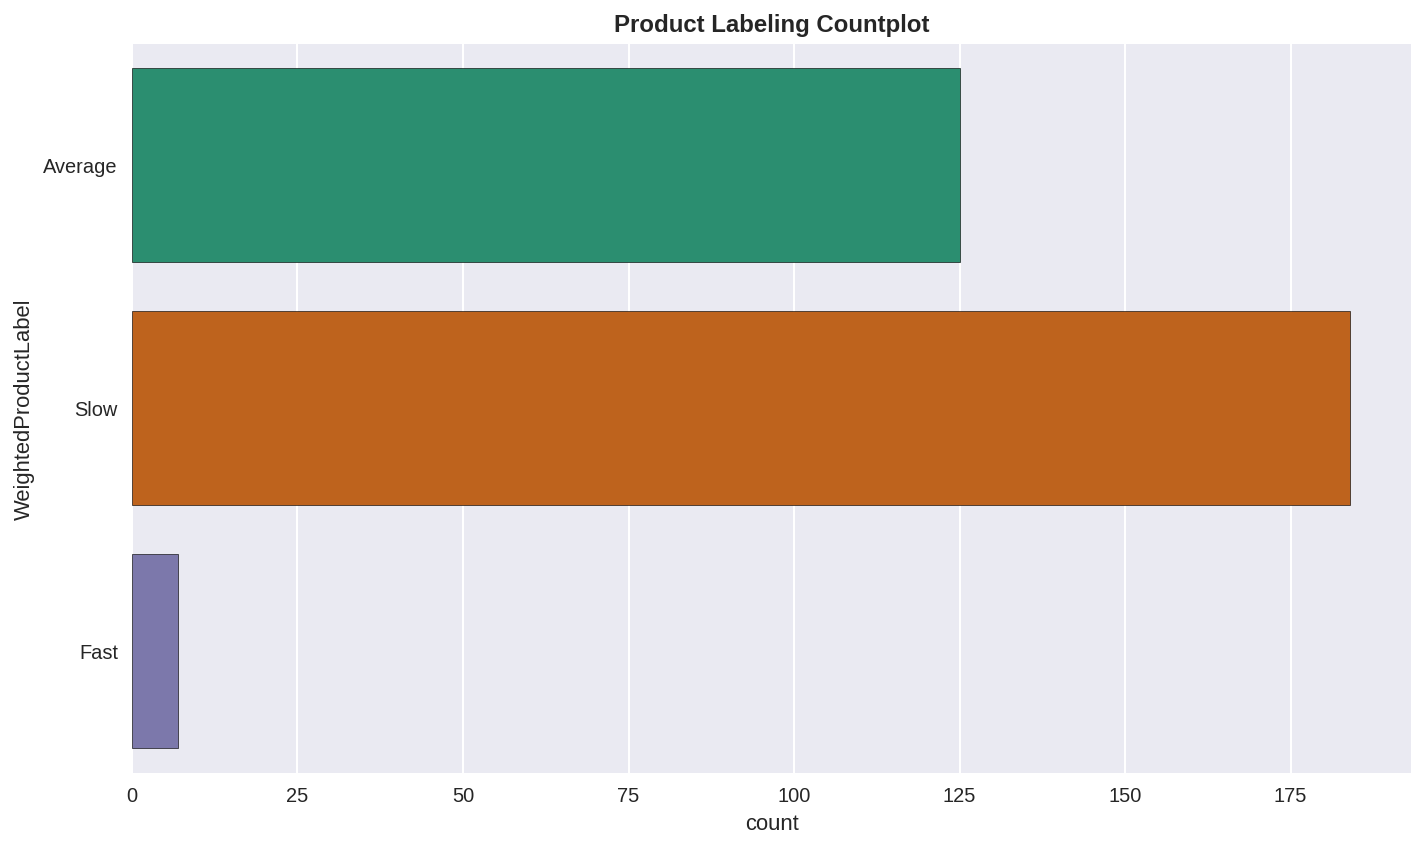

In [153]:
# Countplot of labels:
plt.figure(figsize=(10, 6))
sns.countplot(data=avg_label_value_product,
              y='WeightedProductLabel',
              hue='WeightedProductLabel',
              edgecolor='k',
              palette='Dark2')

plt.title('Product Labeling Countplot')
plt.tight_layout()
plt.show()